In [1]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os, sys
# Add the 'scripts' directory to the Python path for module imports
sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))

In [4]:
# Import load_data function from scripts
from load_data import load_data

# read the dataset 

data = load_data('../data/MachineLearningRating_v3.zip', filename='MachineLearningRating_v3.txt')

In [5]:
# Explore the first few rows
data.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [6]:
# Find the number of rows and columns
data.shape

(1000098, 52)

## Data Cleaning
Handle missing or incomplete data: Since the dataset spans several categories, some fields may have missing values.

In [7]:
# Import the Class to data processing

from data_processing import DataProcessing
# Create instance of the class
data_processing = DataProcessing(data)

# Summary of Missing data
missing_summary = data_processing.missing_data_summary()

# Display results
missing_summary

,Missing Count,Percentage (%)
NumberOfVehiclesInFleet,1000098,100.000000
CrossBorder,999400,99.930207
CustomValueEstimate,779642,77.956560
WrittenOff,641901,64.183810
Converted,641901,64.183810
Rebuilt,641901,64.183810
NewVehicle,153295,15.327998
Bank,145961,14.594670
AccountType,40232,4.022806
Gender,9536,0.953507


# Drop Columns with High Missing Data:

Columns with high missing values offer little analytical value.
Dropped Columns

NumberOfVehiclesInFleet (100% missing)
CrossBorder (~99.93%)
CustomValueEstimate (~77.96%)
Converted, Rebuilt, WrittenOff (~64.18%)

In [8]:
cols_to_drop = ['NumberOfVehiclesInFleet', 
                'CrossBorder', 
                'CustomValueEstimate', 
                'Converted', 'Rebuilt', 
                'WrittenOff']

# Drop these columns
data = data_processing.handle_missing_data('high', cols_to_drop)

## Impute Moderate Missing Data:

Imputation preserves useful information, using the mode for categorical and median for numerical columns.
Imputed Columns:

NewVehicle (~15.33%)
Bank (~14.59%)
AccountType (~4.02%)

In [9]:

# Impute or drop columns with moderate missing data
missing_cols = ['NewVehicle', 'Bank', 'AccountType']
data = data_processing.handle_missing_data('moderate', missing_cols)

# Overall Decision Summary:

High missing data: Dropped.

Moderate missing data: Imputed with mode (categorical) or median (numerical).

Low missing data: Imputed to avoid unnecessary data loss.

In [10]:
# Check duplicates
data.duplicated().sum()

np.int64(74)

## Summarize Key Statistics

### Descriptive statistics:
In the descriptive statistics calculate and examine the variability for numerical features such as TotalPremium, TotalClaim, etc.

In [ ]:
# Statistic summary of numerical features
num_cols = ['SumInsured', 'CalculatedPremiumPerTerm', 'TotalPremium', 'TotalClaims']
display(data[num_cols].describe())

Insights:

Skewness: The data for all columns is highly skewed with a long tail of high values (especially for SumInsured, CalculatedPremiumPerTerm, TotalPremium, and TotalClaims). The mean values are much higher than the medians, which implies a small number of high-value policies and premiums influence the average.

Outliers: Significant outliers exist, particularly in TotalPremium and TotalClaims, where negative values could indicate refunds or adjustments, while high values drive the average up.

Majority of Policies: The majority of policies have small insured sums, low premiums, and zero claims, as indicated by the 50th and 75th percentiles being much lower than the maximum values.

These insights suggest that a large proportion of the policies are low in terms of both insured amounts and premiums, while a small number of high-value policies dominate the high-end of the distributions.

Data Structure Review:

It's important to review the data types to ensure that:

Numerical Columns are in the correct numeric format (int, float).
Categorical Variables (e.g., Gender, PolicyType) are encoded as categories or objects.
Dates are formatted as datetime for proper time-series analysis.

In [11]:
# Check the Data types of each column

data_types = data.dtypes

data_types.reset_index(name='data type')

,index,data type
0,UnderwrittenCoverID,int64
1,PolicyID,int64
2,TransactionMonth,object
3,IsVATRegistered,bool
4,Citizenship,object
5,LegalType,object
6,Title,object
7,Language,object
8,Bank,object
9,AccountType,object


### Since the VehicleIntroDate column is of type object, it should be transformed into a proper date format (datetime). This transformation is essential for performing time-based analysis or working with date-related features effectivel

In [12]:
# Converts the VehicleIntroDate column from object to datetime format.

data['VehicleIntroDate'] = pd.to_datetime(data['VehicleIntroDate'], format='%d/%m/%Y', errors='coerce')  # Convert with error handling

Univariate Analysis:

Distribution of Variables: Plot histograms for numerical columns and bar charts for categorical columns to understand distributions..

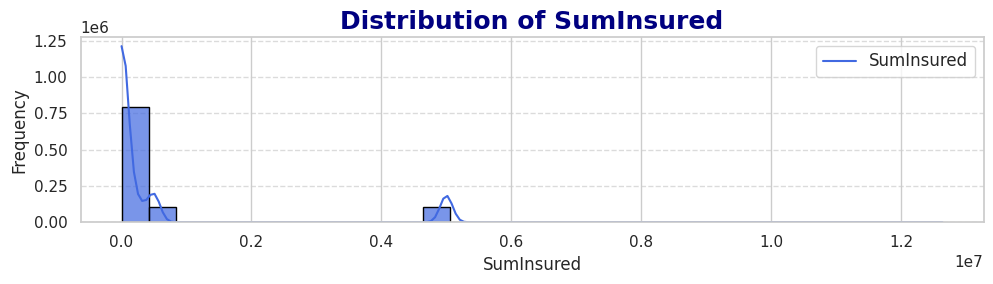

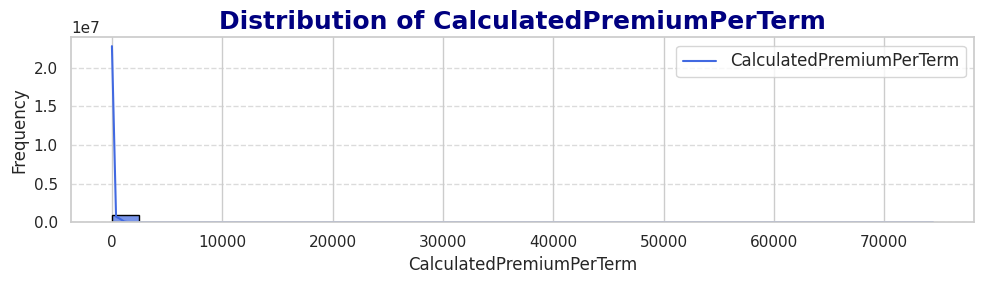

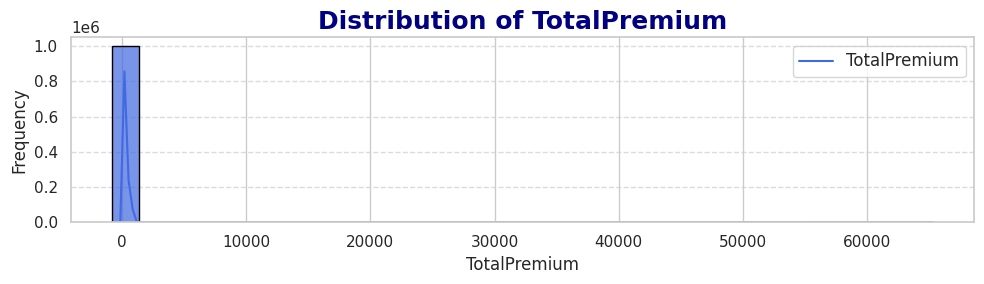

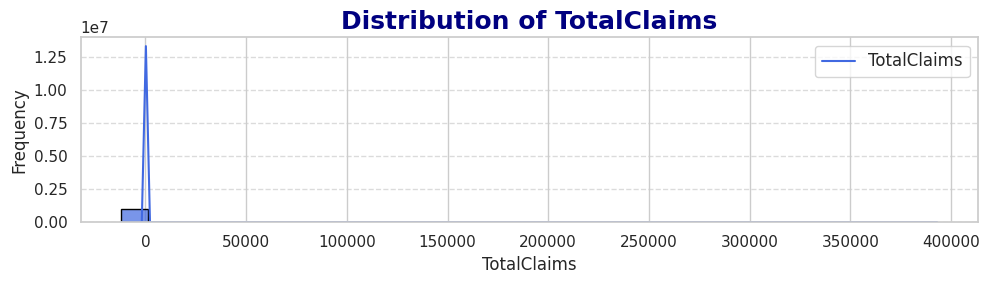

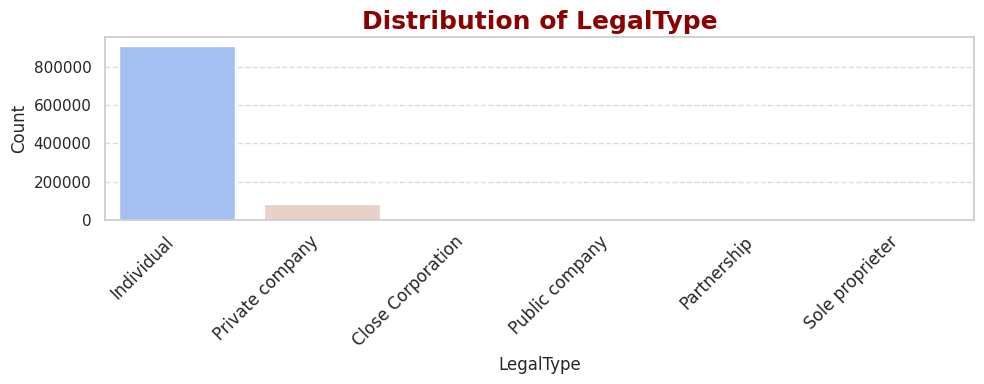

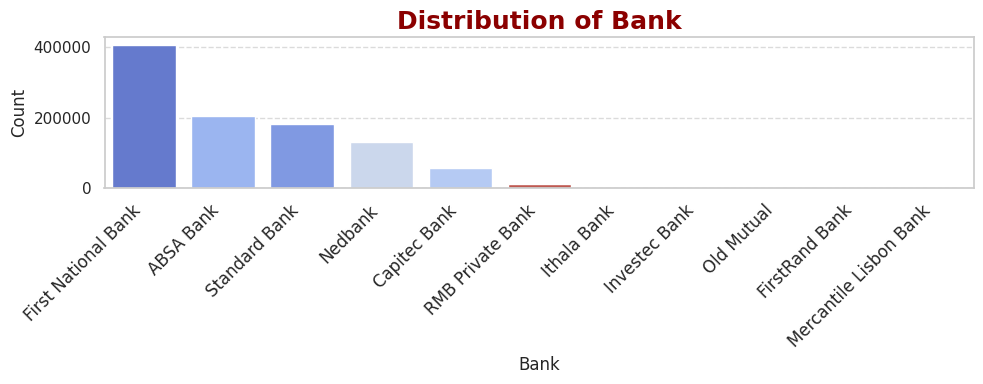

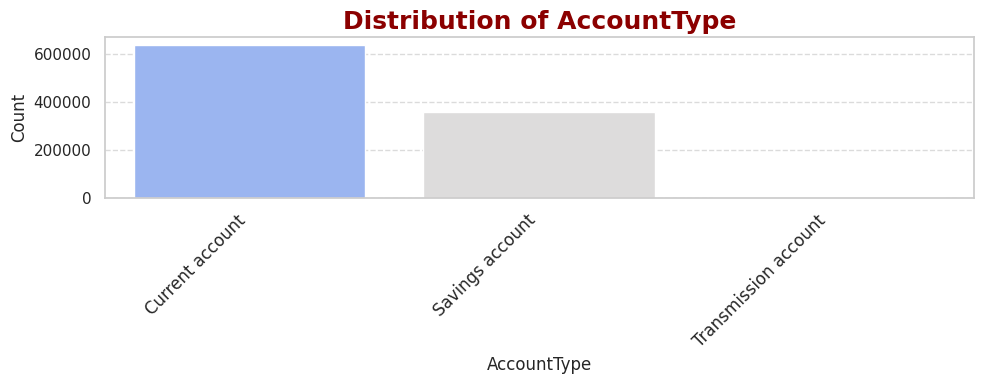

/home/abel/CODE/KiFiya/10-Academy-Week-3/scripts/data_visualization.py:48: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.countplot(x=col, data=self.data, hue=col, legend=False, palette=colors, order=self.data[col].value_counts().index)


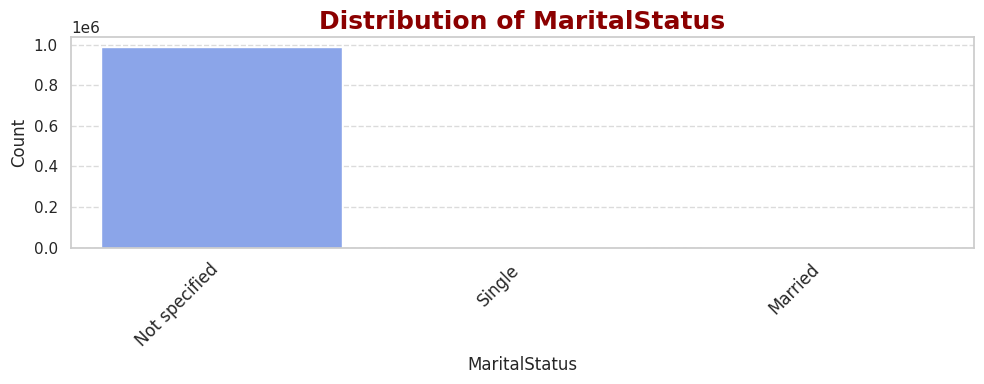

/home/abel/CODE/KiFiya/10-Academy-Week-3/scripts/data_visualization.py:48: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.countplot(x=col, data=self.data, hue=col, legend=False, palette=colors, order=self.data[col].value_counts().index)


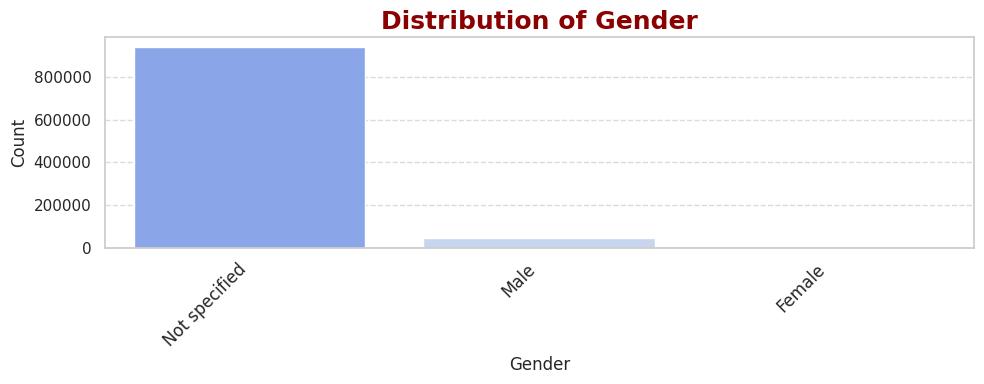

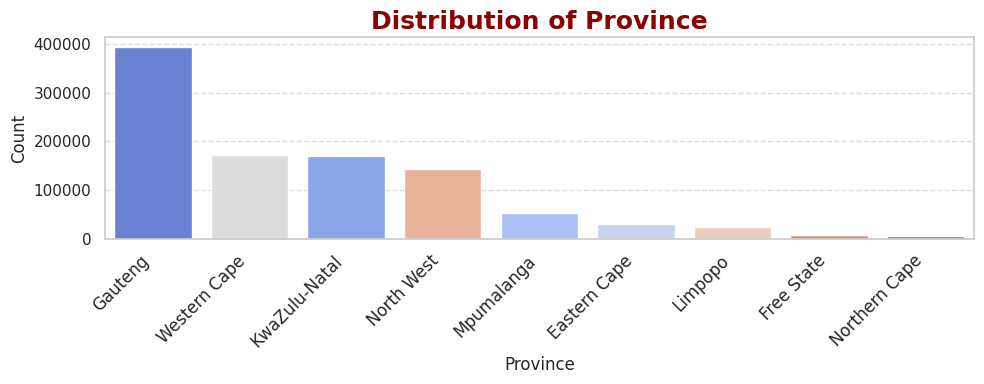

/home/abel/CODE/KiFiya/10-Academy-Week-3/scripts/data_visualization.py:48: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.countplot(x=col, data=self.data, hue=col, legend=False, palette=colors, order=self.data[col].value_counts().index)


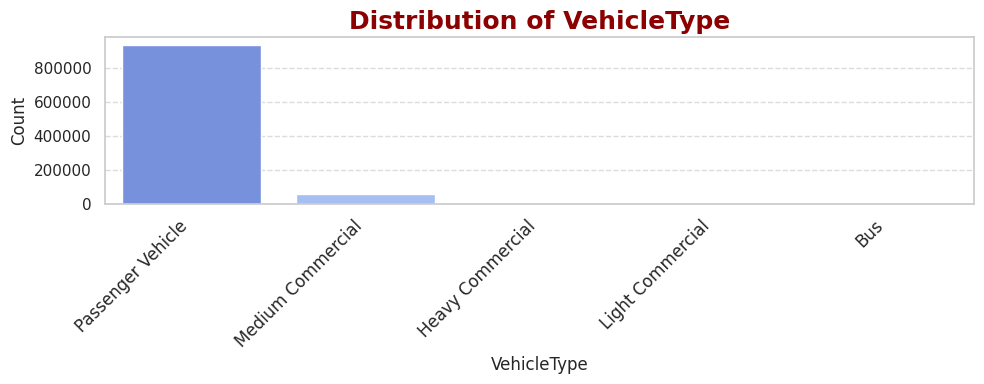

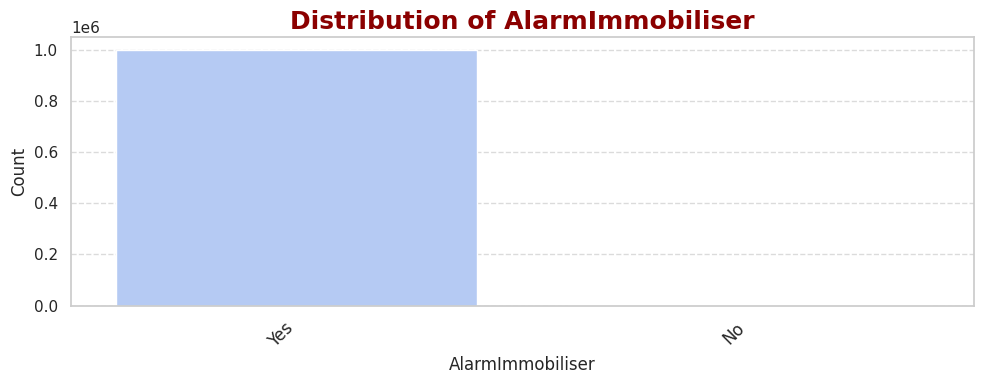

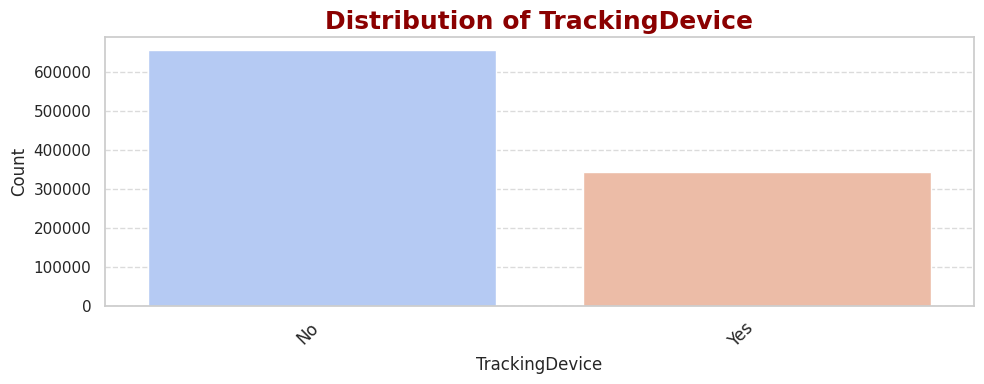

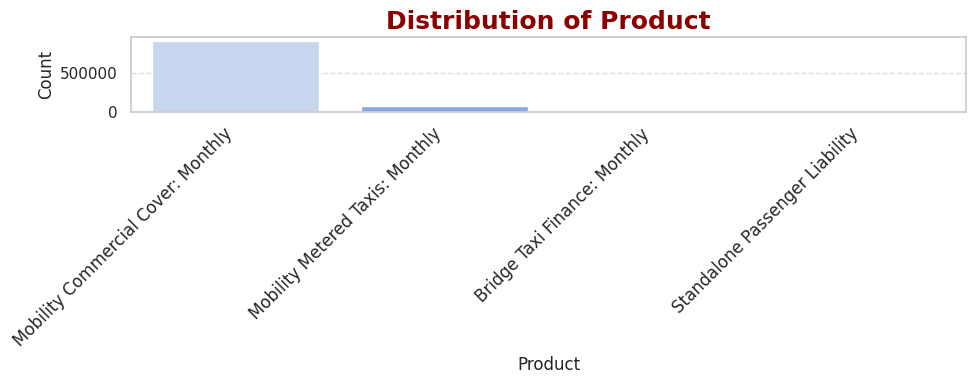

In [13]:
# Import visualizer
from data_visualization import DataVisualizer
# Create instance of the class
vis = DataVisualizer(data)

# Define numerical columns
numerical_cols = [
    'SumInsured', 'CalculatedPremiumPerTerm', 
    'TotalPremium', 'TotalClaims'
]
# Define categorical columns
categorical_cols = [
    'LegalType', 'Bank', 'AccountType', 'MaritalStatus', 
    'Gender', 'Province', 'VehicleType', 
    'AlarmImmobiliser', 'TrackingDevice', 
    'Product'
]

# Plot the plot of both numerical and categorical columns
vis.univariate_analysis(numerical_cols, categorical_cols)

Insights from Univariate Analysis

Numerical Variables:

Sum Insured: The distribution is right-skewed, with most policies having lower sums insured and a few with very high amounts. This indicates a diverse range of policy values, with clusters around specific sums suggesting potential policy tiers.

Calculated Premium Per Term: This variable is also right-skewed, with a peak around a specific amount and variability in premiums. The presence of significantly higher premiums reflects pricing differences among policies.

Total Premium: The distribution is right-skewed, with most policies showing lower total premiums and a peak around zero. High total premiums may be due to refunds or high-risk factors.

Overall, these distributions reveal a wide range of policy values and premiums, with identifiable clusters and outliers that can aid in risk assessment and pricing strategies.

Categorical Variables:

Legal Type: Most policies are issued to individuals, indicating a focus on personal insurance. Private companies and close corporations have fewer policies, with public companies, partnerships, and sole proprietorships being even less common.

Marital Status: A significant portion of data has "Not specified" for marital status, suggesting incomplete information. Single and married individuals are less represented, highlighting potential issues with data collection or privacy concerns.

Province: Gauteng has the highest number of policies, with Western Cape and KwaZulu-Natal showing moderate numbers. Other provinces have fewer policies, indicating a concentration of market presence in specific regions.

Vehicle Type: Passenger vehicles dominate, with fewer policies for commercial vehicle types (medium, heavy, light, and bus). This underscores the company's focus on passenger vehicles.

Gender: A substantial portion of data has "Not specified" for gender, indicating missing information. Male and female categories are present but less common, suggesting potential gaps in data collection or reporting.

Bivariate or Multivariate Analysis:

Correlations and Associations: Explore relationships between the monthly changes TotalPremium and TotalClaims as a function of ZipCode, using scatter plots and correlation matrices.

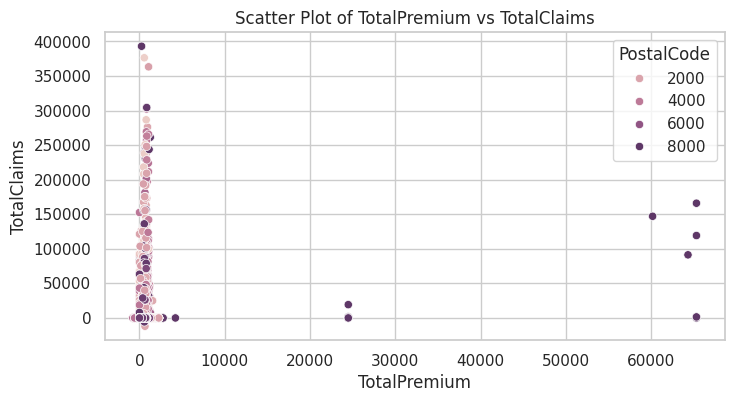

In [14]:
# Define x and y column
x_col = 'TotalPremium'
y_col = 'TotalClaims'
col_hue = 'PostalCode'

# Plot scatter plot
vis.scatter_plot(x_col, y_col, col_hue)